In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_CW = pd.read_csv('Data/CW_HistoricalEmissions_ClimateWatch.csv')
df_GCP = pd.read_csv('Data/CW_HistoricalEmissions_GCP.csv')
df_PIK = pd.read_csv('Data/CW_HistoricalEmissions_PIK.csv')
df_UNFC = pd.read_csv('Data/CW_HistoricalEmissions_UNFCCC.csv')
df_US = pd.read_csv('Data/CW_HistoricalEmissions_US.csv')

# Data Overview and PreProcessing

## Climate Watch Data

Source: https://www.climatewatchdata.org/data-explorer/historical-emissions

Abbreviation/Source Organization's Details:
- CW: Climate Watch Historical GHG Emissions
- GCP: Global Carbon Project
- PIK: Postdam Institute For Climate Impact Research
- UNFCCC: United Nations Framework Convention on Climate Change
- US: World Resources Institute (Not Included, because only provide US state)

In [3]:
print('CW:',df_CW['Gas'].unique())
print('GCP:',df_GCP['Gas'].unique())
print('PIK:',df_PIK['gas'].unique())
print('UNFC:',df_UNFC['gas'].unique())

CW: ['All GHG' 'CO2' 'CH4' 'N2O' 'F-Gas']
GCP: ['CO2']
PIK: ['CH4' 'KYOTOGHG' 'N2O' 'CO2' 'F-Gas']
UNFC: ['Aggregate GHGs' 'CH4' 'CO2' 'N2O' 'Aggregate F-gases']


In [4]:
# print('CW:',df_CW['Sector'].unique())
# print('GCP:',df_GCP['Sector'].unique())
# print('PIK:',df_PIK['sector'].unique())
# print('UNFC:',df_UNFC['sector'].unique())

array1 = df_CW['Sector'].unique()
array2 = df_GCP['Sector'].unique()
array3 = df_PIK['sector'].unique()
array4 = df_UNFC['sector'].unique()

max_length = max(len(array1), len(array2), len(array3), len(array4))

arrays = [np.pad(arr, (0, max_length - len(arr)), mode='constant', constant_values=np.nan) 
          for arr in [array1, array2, array3, array4]]
labels = ["CW", "GCP", "PIK", "UNFC"]
data_sector = {label: arr for label, arr in zip(labels, arrays)}
df_sector = pd.DataFrame(data_sector)

df_sector

,CW,GCP,PIK,UNFC
0,Total excluding LUCF,Cement,Agriculture,Agriculture
1,Total including LUCF,Coal,Energy,Energy
2,Energy,Gas,Industrial Processes and Product Use,Industrial Processes and Product Use
3,Industrial Processes,Gas flaring,Other,"Land Use, Land-Use Change and Forestry"
4,Agriculture,Oil,Total excluding LULUCF,Other
5,Waste,Total fossil fuels and cement,Waste,Total GHG emissions with LULUCF
6,Land-Use Change and Forestry,NaN,NaN,Total GHG emissions without LULUCF
7,Bunker Fuels,NaN,NaN,Waste
8,Electricity/Heat,NaN,NaN,Industrial Processes
9,Building,NaN,NaN,Land-Use Change and Forestry


### CW

In [5]:
display(df_CW.head(), df_CW.shape)
df_CW.columns

,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,AFG,Climate Watch,Total excluding LUCF,All GHG,11.968960,12.198490,11.416530,11.498150,11.535340,11.969910,...,27.115900,29.413060,28.800070,27.015200,26.764020,27.086070,26.894000,26.526930,27.689580,28.636500
1,AFG,Climate Watch,Total including LUCF,All GHG,9.580450,9.809976,9.028016,9.109638,9.146831,9.581401,...,27.237800,29.166840,28.553850,26.768980,26.517800,26.839850,27.048660,26.681590,27.844240,28.791160
2,AFG,Climate Watch,Energy,All GHG,2.614785,2.430223,1.544761,1.457698,1.366936,1.277973,...,8.265836,10.289940,9.627950,7.730256,6.831263,8.087269,7.421360,6.944151,8.228242,8.267433
3,AFG,Climate Watch,Industrial Processes,All GHG,0.052709,0.055380,0.058051,0.061942,0.064613,0.067284,...,0.249415,0.314576,0.394037,0.465779,0.523990,0.601661,0.789337,0.910724,1.075560,1.209746
4,AFG,Climate Watch,Agriculture,All GHG,8.072853,8.396465,8.409491,8.486480,8.523959,8.957016,...,15.788380,15.902260,15.777790,15.724860,16.220450,15.114810,15.317920,15.223620,14.854280,15.544770


(10903, 34)

Index(['Country', 'Source', 'Sector', 'Gas', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [6]:
df_CW_ID = df_CW[df_CW['Country']=='IND']
df_CW_ID.head()

,Country,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4425,IND,Climate Watch,Total excluding LUCF,All GHG,1219.55400,1273.25200,1298.27900,1331.21800,1375.47500,1440.60800,...,2533.9930,2645.6270,2795.864,2863.8360,3044.9600,3064.5430,3106.3430,3242.1720,3388.9150,3394.8720
4426,IND,Climate Watch,Total including LUCF,All GHG,1002.55600,1056.25400,1081.28100,1114.22000,1158.48100,1223.65400,...,2546.7930,2584.7470,2740.398,2804.3400,2984.5170,3003.0680,3076.4790,3215.0730,3360.5610,3363.5950
4427,IND,Climate Watch,Energy,All GHG,602.04540,645.15470,661.96830,685.70040,718.91210,770.77090,...,1668.1320,1762.1370,1907.683,1963.5380,2133.1510,2144.3240,2177.1750,2305.0820,2421.7090,2422.2380
4428,IND,Climate Watch,Industrial Processes,All GHG,26.44543,28.99591,30.05639,31.89687,34.28735,37.39374,...,100.0816,106.2293,115.987,124.4546,133.3223,135.8900,143.3061,142.6221,162.2382,168.5543
4429,IND,Climate Watch,Agriculture,All GHG,566.52730,573.90940,580.40590,587.11590,595.11500,599.53900,...,691.4386,701.8102,695.634,698.1737,699.7076,704.4405,704.8816,712.3949,721.8024,719.8204


### GCP

In [7]:
display(df_GCP.head(), df_GCP.shape)
df_GCP.columns

,Country name,Country,Sector,Source,Gas,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,AFG,Cement,GCP,CO2,0.018012,0.021806,0.029074,0.05088,0.061783,...,0.02893,0.03555,0.028644,0.041189,0.076126,0.044785,0.05688,0.038329,0.060674,0.012259
1,Afghanistan,AFG,Coal,GCP,CO2,0.127120,0.175870,0.296780,0.26381,0.300450,...,3.12540,3.32690,3.705800,2.843300,2.878700,3.447800,3.84720,3.954800,4.150100,4.203500
2,Afghanistan,AFG,Gas,GCP,CO2,NaN,NaN,NaN,NaN,NaN,...,0.30778,0.29678,0.271240,0.282130,0.318640,0.300450,0.29312,0.245570,0.251240,0.238850
3,Afghanistan,AFG,Gas flaring,GCP,CO2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,Oil,GCP,CO2,0.268760,0.293120,0.362740,0.39205,0.476320,...,6.57320,5.59130,5.164600,6.624500,5.794100,6.074900,6.62080,6.843000,7.219800,7.419600


(935, 67)

Index(['Country name', 'Country', 'Sector', 'Source', 'Gas', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [8]:
df_GCP_ID = df_GCP[df_GCP['Country name']=='Indonesia']
df_GCP_ID.head()
# Null Value on Gas flaring 1960-1969

,Country name,Country,Sector,Source,Gas,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
372,Indonesia,IDN,Cement,GCP,CO2,0.19258,0.22169,0.25077,0.16354,0.21806,...,23.2940,24.7750,25.5337,24.5579,28.7098,28.9657,30.8320,30.1560,28.2035,28.6374
373,Indonesia,IDN,Coal,GCP,CO2,1.82070,1.52790,1.30070,1.59380,1.20550,...,187.1713,164.2192,173.5843,197.8152,206.3279,221.0933,262.2221,315.4007,300.5179,303.1536
374,Indonesia,IDN,Gas,GCP,CO2,4.66710,4.92810,5.19190,5.37140,5.24320,...,80.0621,64.7533,62.4157,94.2527,91.1860,84.3385,84.1479,87.9104,74.9609,74.0879
375,Indonesia,IDN,Gas flaring,GCP,CO2,NaN,NaN,NaN,NaN,NaN,...,6.6493,5.8993,5.7635,5.4607,5.0892,4.3870,3.9464,3.7837,3.5250,3.1493
376,Indonesia,IDN,Oil,GCP,CO2,14.70480,19.32390,16.23150,15.63430,15.70760,...,218.7774,229.4083,220.5928,217.0627,221.3386,228.4703,222.5087,222.1850,202.5790,210.2494


### PIK

In [9]:
display(df_PIK.head(), df_PIK.shape)
df_PIK.columns

,country,sector,gas,Source,1850,1851,1852,1853,1854,1855,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,Agriculture,CH4,PIK,0.000050,0.000051,0.000052,0.000053,0.000054,0.000055,...,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280
1,ABW,Agriculture,KYOTOGHG,PIK,0.000054,0.000055,0.000057,0.000058,0.000059,0.000060,...,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160
2,ABW,Agriculture,N2O,PIK,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882
3,ABW,Energy,CH4,PIK,0.000199,0.000196,0.000195,0.000197,0.000199,0.000201,...,0.004775,0.014075,0.011150,0.008200,0.005225,0.002230,0.001483,0.001497,0.001478,0.001458
4,ABW,Energy,CO2,PIK,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.350000,0.862000,0.873000,0.899000,0.884000,0.933000,0.961000,0.993000,0.874000,0.980000


(4756, 176)

Index(['country', 'sector', 'gas', 'Source', '1850', '1851', '1852', '1853',
       '1854', '1855',
       ...
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object', length=176)

In [10]:
df_PIK_ID = df_PIK[df_PIK['country']=='IND']
df_PIK_ID.head()

,country,sector,gas,Source,1850,1851,1852,1853,1854,1855,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1950,IND,Agriculture,CH4,PIK,144.7500,145.250,146.0000,146.5000,147.0000,147.500,...,362.500,362.500,362.50,360.000,360.000,365.000,367.500,367.500,365.000,365.000
1951,IND,Agriculture,CO2,PIK,0.0000,0.000,0.0000,0.0000,0.0000,0.000,...,12.300,12.600,12.60,12.600,12.300,12.300,12.400,13.400,13.700,13.900
1952,IND,Agriculture,KYOTOGHG,PIK,151.0000,152.000,152.0000,153.0000,154.0000,154.000,...,462.000,466.000,468.00,472.000,474.000,478.000,484.000,484.000,488.000,491.000
1953,IND,Agriculture,N2O,PIK,6.1388,6.258,6.3772,6.4964,6.6156,6.705,...,87.612,90.592,93.87,98.638,101.022,102.214,104.598,103.704,110.558,113.538
1954,IND,Energy,CH4,PIK,15.0750,15.175,15.2500,15.3500,15.4250,15.525,...,62.000,49.500,50.25,51.000,51.750,52.250,49.750,49.000,48.000,47.500


### UNFCCC

In [11]:
display(df_UNFC.head(), df_UNFC.shape)
df_UNFC.columns

,country,source,sector,gas,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ANNEXI,UNFCCC_AI,Agriculture,Aggregate GHGs,1704.788001,1648.445387,1606.013884,1601.057443,1552.592246,1534.835798,...,1411.344757,1400.278553,1456.357168,1471.542463,1475.642275,1473.786987,1485.896266,1500.086386,1500.814442,1476.407205
1,ANNEXI,UNFCCC_AI,Agriculture,CH4,863.697054,849.167408,834.769139,823.673298,817.513276,805.542272,...,703.307543,708.258286,706.442061,706.736879,712.165491,717.750980,726.261640,730.295841,724.134245,722.836839
2,ANNEXI,UNFCCC_AI,Agriculture,CO2,41.443983,36.442904,33.084013,29.780829,26.840862,26.768078,...,27.213644,30.212195,28.722091,29.364094,29.229262,29.642398,29.842849,29.116037,28.905011,29.948577
3,ANNEXI,UNFCCC_AI,Agriculture,N2O,799.646963,762.835076,738.160731,747.603315,708.238108,702.525448,...,680.823570,661.808072,721.193016,735.441490,734.247522,726.393609,729.791777,740.674507,747.775185,723.621788
4,ANNEXI,UNFCCC_AI,Energy,Aggregate GHGs,15168.882747,14908.041102,14427.430302,14275.728805,14062.533168,14118.617356,...,14071.990239,13878.879040,13839.810604,13608.596430,13435.672544,13287.658522,13295.029598,13404.235074,13055.489140,11942.405628


(4993, 35)

Index(['country', 'source', 'sector', 'gas', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

In [12]:
df_UNFC_ID = df_UNFC[df_UNFC['country']=='IDN']
df_UNFC_ID.head(5)
# Null Value in 1995-2020

,country,source,sector,gas,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2867,IDN,UNFCCC_NAI,Agriculture,Aggregate GHGs,75.10112,83.58546,84.85189,84.85237,84.50724,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2868,IDN,UNFCCC_NAI,Agriculture,CH4,58.66182,67.24536,67.56939,67.88607,68.12064,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2869,IDN,UNFCCC_NAI,Agriculture,N2O,16.43930,16.34010,17.28250,16.96630,16.38660,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2870,IDN,UNFCCC_NAI,Energy,Aggregate GHGs,169.61637,186.37305,198.27983,208.14643,222.09984,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2871,IDN,UNFCCC_NAI,Energy,CH4,39.64338,44.33205,46.66788,48.09168,50.31033,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(df_CW_ID.shape, df_GCP_ID.shape, df_PIK_ID.shape, df_UNFC_ID.shape)

(57, 34) (6, 67) (25, 176) (27, 35)


## Annual Mean Temperature Indonesia

Source Data: https://climateknowledgeportal.worldbank.org/country/indonesia/climate-data-historical

In [14]:
df_DtempID = pd.read_csv('data/observed-average-annual-mean-temperature-of-indonesia-for-1901-2021.csv')
df_DtempID.head()

,Category,Annual Mean,5-yr smooth
0,1901,25.40,25.41
1,1902,25.37,25.39
2,1903,25.37,25.37
3,1904,25.36,25.35
4,1905,25.41,25.35


Text(0, 0.5, 'Temp (C)')

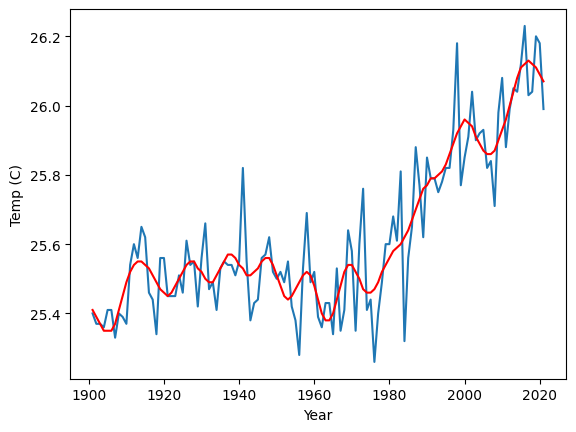

In [15]:
plt.plot(df_DtempID.Category, df_DtempID['Annual Mean'], '-')
plt.plot(df_DtempID.Category, df_DtempID['5-yr smooth'], 'r-')
plt.xlabel('Year')
plt.ylabel('Temp (C)')

### Optimize Curve Fit

array([1.08133907e-10, 1.63426922e+01, 2.33223809e-04])

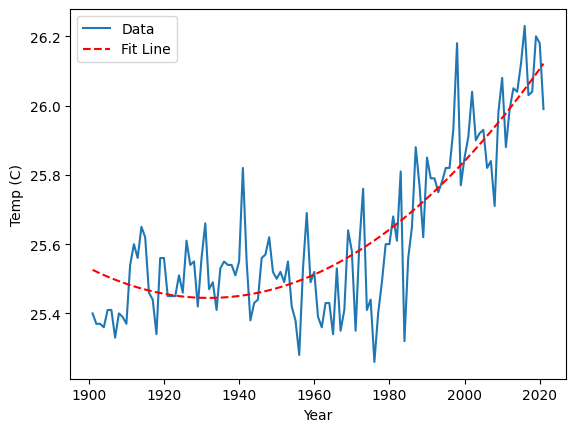

In [16]:
import numpy as np
from scipy.optimize import curve_fit

def model_f(x, a, b, c):
    return a*(x-b)**2 + c

x_data = df_DtempID.Category
y_data = df_DtempID['Annual Mean']
popt, pcov = curve_fit(model_f, x_data, y_data)

a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 250)
y_model = model_f(x_model, a_opt, b_opt, c_opt) 
 
display(np.diag(pcov))
plt.plot(x_data, y_data, '-', label='Data')
plt.plot(x_model, y_model, '--', color='r', label='Fit Line')
plt.xlabel('Year')
plt.ylabel('Temp (C)')
plt.legend()
plt.show()

## World Bank Data

Source: https://databank.worldbank.org/

In [83]:
df_DBW = pd.read_csv('Data/DataBank.csv')

display(df_DBW.head(), df_DBW.shape)
df_DBW.columns

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1.954298e+07,1.968863e+07,2.100026e+07,2.264513e+07,2.355355e+07,2.441119e+07,2.544294e+07,2.590330e+07,2.642720e+07,2.738531e+07,2.818967e+07,2.924916e+07,3.046648e+07,3.154121e+07,3.271621e+07,3.375350e+07
1,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1.443803e+00,7.425168e-01,6.449321e+00,7.541019e+00,3.933178e+00,3.576508e+00,4.139678e+00,1.793196e+00,2.002333e+00,3.561288e+00,2.894904e+00,3.689508e+00,4.077628e+00,3.466788e+00,3.657576e+00,3.121341e+00
2,Afghanistan,AFG,Surface area (sq. km),AG.SRF.TOTL.K2,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05,6.528600e+05
3,Afghanistan,AFG,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.370000e+01,NaN,NaN,NaN,3.830000e+01,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.259727e+10,1.475685e+10,1.596675e+10,1.968237e+10,2.147012e+10,2.123442e+10,2.063865e+10


(10421, 20)

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]'],
      dtype='object')

In [84]:
print(df_DBW[df_DBW['Country Name'] == 'Indonesia'][['Series Name']])

                                            Series Name
4272                                  Population, total
4273                       Population growth (annual %)
4274                              Surface area (sq. km)
4275  Poverty headcount ratio at national poverty li...
4276                    GNI, Atlas method (current US$)
4277         GNI per capita, Atlas method (current US$)
4278                 GNI, PPP (current international $)
4279      GNI per capita, PPP (current international $)
4280                    Income share held by lowest 20%
4281            Life expectancy at birth, total (years)
4282           Fertility rate, total (births per woman)
4283  Adolescent fertility rate (births per 1,000 wo...
4284  Contraceptive prevalence, any method (% of mar...
4285  Births attended by skilled health staff (% of ...
4286    Mortality rate, under-5 (per 1,000 live births)
4287  Prevalence of underweight, weight for age (% o...
4288  Immunization, measles (% of children ages 

In [85]:
df_DBW[df_DBW['Country Name'] == 'Indonesia'][['Series Name']].to_csv('Indo_SeriesDetail.txt', index=False, header=False, sep='\n')

In [86]:
df_DBW_ID = df_DBW[df_DBW['Country Name']=='Indonesia']
df_DBW_ID.head()

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
4272,Indonesia,IDN,"Population, total",SP.POP.TOTL,2.140724e+08,2.171124e+08,2.201151e+08,2.230801e+08,2.259386e+08,2.288051e+08,2.317974e+08,2.348583e+08,2.379365e+08,2.409813e+08,2.440162e+08,2.470997e+08,2.502227e+08,2.532759e+08,2.562298e+08,2.590920e+08
4273,Indonesia,IDN,Population growth (annual %),SP.POP.GROW,1.447088e+00,1.410099e+00,1.373519e+00,1.338044e+00,1.273226e+00,1.260748e+00,1.299309e+00,1.311848e+00,1.302171e+00,1.271532e+00,1.251517e+00,1.255738e+00,1.255941e+00,1.212818e+00,1.159507e+00,1.110855e+00
4274,Indonesia,IDN,Surface area (sq. km),AG.SRF.TOTL.K2,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910930e+06,1.910931e+06,1.913580e+06
4275,Indonesia,IDN,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,1.910000e+01,1.840000e+01,1.820000e+01,1.740000e+01,1.670000e+01,1.600000e+01,1.780000e+01,1.660000e+01,1.540000e+01,1.410000e+01,1.330000e+01,1.250000e+01,1.200000e+01,1.140000e+01,1.130000e+01,1.120000e+01
4276,Indonesia,IDN,"GNI, Atlas method (current US$)",NY.GNP.ATLS.CD,1.224500e+11,1.542150e+11,1.724990e+11,1.982340e+11,2.413930e+11,2.767590e+11,3.155650e+11,3.719090e+11,4.570900e+11,5.129660e+11,6.122540e+11,7.377170e+11,8.892790e+11,9.397550e+11,9.229960e+11,8.865470e+11


In [88]:
df_DBW_ID.isnull().sum().sum()

48

### Feature Overview

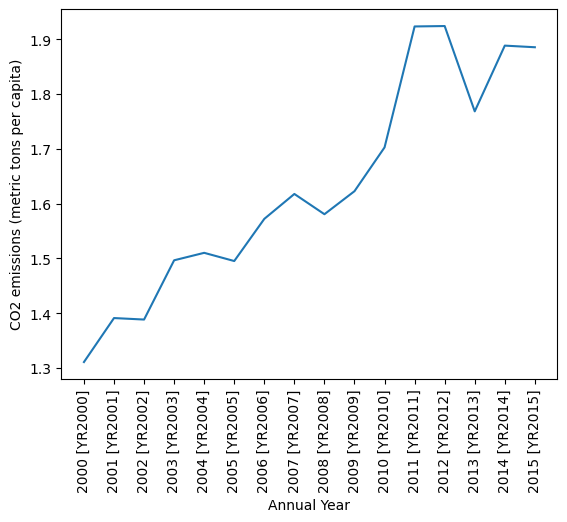

In [22]:
value_label = 'CO2 emissions (metric tons per capita)'

x_d = df_DBW_ID.columns[4:]
y_d = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == value_label][x_d]).astype(float).flatten()
plt.xticks(rotation='vertical')
plt.xlabel('Annual Year')
plt.ylabel(value_label)
plt.plot(x_d, y_d)

In [ ]:
CO2_Em = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'CO2 emissions (metric tons per capita)'][x_d]).astype(float).flatten()
EnergyU = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'Energy use (kg of oil equivalent per capita)'][x_d]).astype(float).flatten()
Epc = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'Electric power consumption (kWh per capita)'][x_d]).astype(float).flatten()
ForestAr = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'Forest area (sq. km)'][x_d]).astype(float).flatten()

# Pisahkan variabel independen (X) dan variabel dependen (y)
X = data[CO2_Em, EnergyU, Epc, ForestAr]

X

array([9.80547002e-01, 1.14554039e+04])

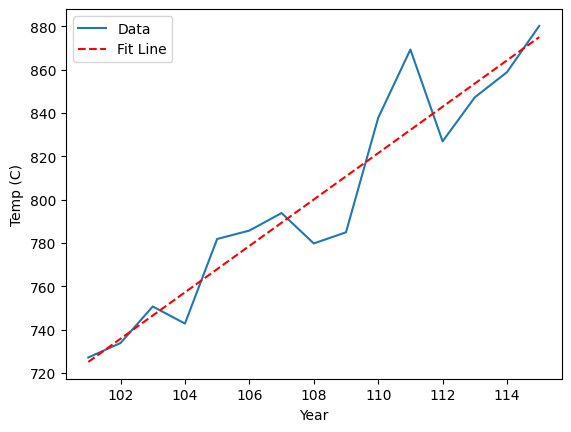

In [81]:
import numpy as np
from scipy.optimize import curve_fit

def model_f(x, a, b, c):
    return a*(x-b)**2 + c

def model_c(x, a, b):
    return a*x + b

sequence = np.array([727.117768243486, 733.782413395323, 750.645380553915, 742.771660949565,
                    781.802006868282, 785.675596524176, 793.773030103565, 779.737358982463,
                    784.87765538394, 837.709531144987, 869.232966783722, 826.870953225005,
                    847.172044086569, 858.805727435958, 880.12100202521])

x_data = [x+101 for x in range(len(sequence))]
y_data = sequence
popt, pcov = curve_fit(model_c, x_data, y_data)

a_opt, b_opt = popt
x_model = np.linspace(min(x_data), max(x_data), 250)
y_model = model_c(x_model, a_opt, b_opt) 
 
display(np.diag(pcov))
plt.plot(x_data, y_data, '-', label='Data')
plt.plot(x_model, y_model, '--', color='r', label='Fit Line')
plt.xlabel('Year')
plt.ylabel('Temp (C)')
plt.legend()
plt.show()

In [82]:
# model_f(x_data[-1]+1, popt[0], popt[1], popt[2])
model_c(x_data[-1]+1, popt[0], popt[1])

885.65372280741

In [73]:
x_data

[101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]

In [55]:
import numpy as np
import pandas as pd

sequence = np.array([727.117768243486, 733.782413395323, 750.645380553915, 742.771660949565,
                    781.802006868282, 785.675596524176, 793.773030103565, 779.737358982463,
                    784.87765538394, 837.709531144987, 869.232966783722, 826.870953225005,
                    847.172044086569, 858.805727435958, 880.12100202521, np.nan])

# Fill NaN values using forward-fill (pad) method
filled_sequence = pd.Series(sequence).fillna(method='ffill').values

print(filled_sequence)


[727.11776824 733.7824134  750.64538055 742.77166095 781.80200687
 785.67559652 793.7730301  779.73735898 784.87765538 837.70953114
 869.23296678 826.87095323 847.17204409 858.80572744 880.12100203
 880.12100203]


In [ ]:
EnergyU = pd.Series(np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'Energy use (kg of oil equivalent per capita)'][x_d]).flatten()).fillna('..').values
Epc = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'Electric power consumption (kWh per capita)'][x_d]).astype(float).flatten()
ForestAr = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'Forest area (sq. km)'][x_d]).astype(float).flatten()
EnergyU

array(['727.117768243486', '733.782413395323', '750.645380553915',
       '742.771660949565', '781.802006868282', '785.675596524176',
       '793.773030103565', '779.737358982463', '784.87765538394',
       '837.709531144987', '869.232966783722', '826.870953225005',
       '847.172044086569', '858.805727435958', '880.12100202521', '..'],
      dtype=object)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

CO2_Em = np.array(df_DBW_ID[df_DBW_ID['CO2 emissions (metric tons per capita)'] == value_label][x_d]).astype(float).flatten()
EnergyU = np.array(df_DBW_ID[df_DBW_ID['Energy use (kg of oil equivalent per capita)'] == value_label][x_d]).astype(float).flatten()
Epc = np.array(df_DBW_ID[df_DBW_ID['Electric power consumption (kWh per capita)'] == value_label][x_d]).astype(float).flatten()
ForestAr = np.array(df_DBW_ID[df_DBW_ID['Forest area (sq. km)'] == value_label][x_d]).astype(float).flatten()

# Pisahkan variabel independen (X) dan variabel dependen (y)
X = data[CO2_Em, EnergyU, Epc, ForestAr]
y = data['Gas Rumah Kaca']

# Buat model regresi linear
model = LinearRegression()
model.fit(X, y)

# Cetak koefisien regresi untuk masing-masing variabel
coefficients = pd.DataFrame({'Variabel': X.columns, 'Koefisien': model.coef_})
coefficients.sort_values(by='Koefisien', ascending=False, inplace=True)
print(coefficients)

# Cetak variabel yang paling berpengaruh
most_influential = coefficients.iloc[0]['Variabel']
print("Variabel paling berpengaruh: ", most_influential)


# Simulate

## Old Optimization Algorithm

### Genetic Algorithm

**Formula:**

The objective function for optimizing greenhouse gas emissions using the Genetic Algorithm can be represented as:


$ \text{Objective Function}(x) = \sum_{i=1}^{n} \left( w_{\text{ghg}} \cdot \text{GHG}_{\text{data}}[i] + w_{\text{temperature}} \cdot \text{Temperature}_{\text{data}}[i] + w_{\text{population}} \cdot \text{Population}_{\text{data}}[i] \right) $

where:
- $ \text{Objective Function}(x) $ is the fitness value of the solution.
- $ x $ represents the vector of weights for GHG emissions, temperature, and population.
- $ w_{\text{ghg}} $, $ w_{\text{temperature}} $, and $ w_{\text{population}} $ are the weights for GHG emissions, temperature, and population, respectively.
- $ \text{GHG}_{\text{data}}[i] $, $ \text{Temperature}_{\text{data}}[i] $, and $ \text{Population}_{\text{data}}[i] $ are the corresponding normalized datasets for the $ i $th data point.

In this formulation, the objective function calculates the sum of the weighted values of GHG emissions, temperature, and population across all data points.

In [ ]:
df_DtempID.head()

,Category,Annual Mean,5-yr smooth
0,1901,25.40,25.41
1,1902,25.37,25.39
2,1903,25.37,25.37
3,1904,25.36,25.35
4,1905,25.41,25.35


In [ ]:
np.array(df_DtempID[(df_DtempID['Category'] >= 2000) & (df_DtempID['Category'] <= 2015)][['Annual Mean']]).flatten()

array([25.85, 25.91, 26.04, 25.9 , 25.92, 25.93, 25.82, 25.84, 25.71,
       25.98, 26.08, 25.88, 25.99, 26.05, 26.04, 26.12])

 The best solution found:                                                                           
 [0.00678628 0.00289441 0.99414613]

 Objective function:
 7.990146338814977


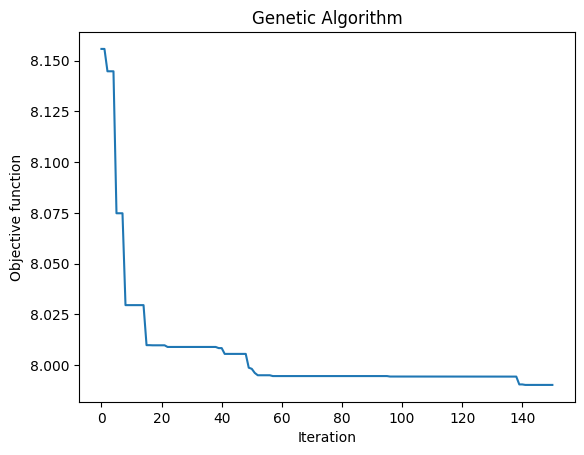

Optimized Weights:
GHG Weights: 0.0067862820920020495
Temperature Weights: 0.002894406376752978
Population Weights: 0.9941461273841162


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from geneticalgorithm import geneticalgorithm as ga

# Load the dataset (assuming the data is stored in separate arrays)
ghg_data = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'CO2 emissions (metric tons per capita)'][x_d]).astype(float).flatten()  # Annual number of GHG emissions
temperature_data = np.array(df_DtempID[(df_DtempID['Category'] >= 2000) & (df_DtempID['Category'] <= 2015)][['Annual Mean']]).flatten()  # Annual mean temperature
population_data = np.array(df_DBW_ID[df_DBW_ID['Series Name'] == 'Population, total'][x_d]).astype(float).flatten()  # Annual number of population

# Normalize the dataset
scaler = MinMaxScaler()
ghg_data_normalized = scaler.fit_transform(ghg_data.reshape(-1, 1))
temperature_data_normalized = scaler.fit_transform(temperature_data.reshape(-1, 1))
population_data_normalized = scaler.fit_transform(population_data.reshape(-1, 1))

# Define the objective function for the Genetic Algorithm
def objective_function(x):
    ghg_weights, temperature_weights, population_weights = x
    total_weights = ghg_weights + temperature_weights + population_weights
    
    # Normalize the weights
    ghg_weights /= total_weights
    temperature_weights /= total_weights
    population_weights /= total_weights
    
    # Calculate the weighted sum of normalized data
    weighted_sum = (
        ghg_weights * ghg_data_normalized +
        temperature_weights * temperature_data_normalized +
        population_weights * population_data_normalized
    )
    
    # Calculate the fitness value (e.g., minimize the sum of weighted values)
    fitness = np.sum(weighted_sum)
    
    return fitness

# Define the bounds for the variables (weights)
varbound = np.array([[0, 1]] * 3)  # Bounds for ghg_weights, temperature_weights, population_weights

# Create an instance of the Genetic Algorithm
model = ga(function=objective_function, dimension=3, variable_type='real', variable_boundaries=varbound)

# Run the optimization
model.run()

# Print the optimized weights
optimized_weights = model.best_variable
ghg_weights_optimized, temperature_weights_optimized, population_weights_optimized = optimized_weights
print("Optimized Weights:")
print("GHG Weights:", ghg_weights_optimized)
print("Temperature Weights:", temperature_weights_optimized)
print("Population Weights:", population_weights_optimized)


### Simulated Annealing Algorithm

Simulated Annealing (SA) is a metaheuristic optimization algorithm that mimics the annealing process in metallurgy. It is used to find the global minimum of a given objective function.

The SA algorithm follows these steps:

1. Initialize the temperature `T` and the initial solution `x`.
2. Repeat until the stopping criterion is met:
     - Generate a new candidate solution `x_new` by perturbing the current solution `x`.
     - Calculate the objective function value for `x_new` as `f_new`.
     - If `f_new` is better than the current objective function value `f`, accept `x_new` as the new solution.
     - If `f_new` is worse than `f`, accept `x_new` with a probability determined by the Metropolis criterion.
     - Decrease the temperature `T` according to a cooling schedule.
3. Return the best solution found during the iterations.

The Metropolis criterion for accepting worse solutions is given by the formula:

$P(\text{accept}) = \exp\left(\frac{{f - f_{\text{new}}}}{{T}}\right)$

where $f$ is the objective function value for the current solution and $f_{\text{new}}$ is the objective function value for the new candidate solution.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import basinhopping

# Load the dataset (assuming the data is stored in separate arrays)
# ghg_data = np.array([ghg1, ghg2, ghg3, ...])  # Annual number of GHG emissions
# temperature_data = np.array([temp1, temp2, temp3, ...])  # Annual mean temperature
# population_data = np.array([pop1, pop2, pop3, ...])  # Annual number of population

# Normalize the dataset
scaler = MinMaxScaler()
ghg_data_normalized = scaler.fit_transform(ghg_data.reshape(-1, 1))
temperature_data_normalized = scaler.fit_transform(temperature_data.reshape(-1, 1))
population_data_normalized = scaler.fit_transform(population_data.reshape(-1, 1))

# Define the objective function for the optimization
def objective_function(x):
    ghg_weights, temperature_weights, population_weights = x
    total_weights = ghg_weights + temperature_weights + population_weights
    
    # Normalize the weights
    ghg_weights /= total_weights
    temperature_weights /= total_weights
    population_weights /= total_weights
    
    # Calculate the weighted sum of normalized data
    weighted_sum = (
        ghg_weights * ghg_data_normalized +
        temperature_weights * temperature_data_normalized +
        population_weights * population_data_normalized
    )
    
    # Calculate the fitness value (e.g., minimize the sum of weighted values)
    fitness = np.sum(weighted_sum)
    
    return fitness

# Define the bounds for the variables (weights)
bounds = [(0, 1), (0, 1), (0, 1)]  # Bounds for ghg_weights, temperature_weights, population_weights

# Define the cooling schedule for the Simulated Annealing algorithm
def cooling_schedule(t):
    return 0.5 * np.exp(-0.1 * t)

# Create an instance of the Simulated Annealing algorithm
optimizer = basinhopping(func=objective_function, x0=[0.5, 0.5, 0.5], minimizer_kwargs={"bounds": bounds}, T=1.0, stepsize=0.5, niter=100, callback=None, take_step=None, accept_test=None, interval=50, disp=False, niter_success=None, seed=None)

# Run the optimization
result = optimizer

# Print the optimized weights
optimized_weights = result.x
ghg_weights_optimized, temperature_weights_optimized, population_weights_optimized = optimized_weights
print("Optimized Weights:")
print("GHG Weights:", ghg_weights_optimized)
print("Temperature Weights:", temperature_weights_optimized)
print("Population Weights:", population_weights_optimized)


Optimized Weights:
GHG Weights: 0.0
Temperature Weights: 0.0
Population Weights: 1.0


### Ant Colony Optimization

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist

# Load the dataset (assuming the data is stored in separate arrays)
# ghg_data = np.array([ghg1, ghg2, ghg3, ...])  # Annual number of GHG emissions
# temperature_data = np.array([temp1, temp2, temp3, ...])  # Annual mean temperature
# population_data = np.array([pop1, pop2, pop3, ...])  # Annual number of population

# Normalize the dataset
scaler = MinMaxScaler()
ghg_data_normalized = scaler.fit_transform(ghg_data.reshape(-1, 1))
temperature_data_normalized = scaler.fit_transform(temperature_data.reshape(-1, 1))
population_data_normalized = scaler.fit_transform(population_data.reshape(-1, 1))

# Define the distance matrix based on the dataset
data = np.concatenate([ghg_data_normalized, temperature_data_normalized, population_data_normalized], axis=1)
distance_matrix = cdist(data, data, metric='euclidean')

# Ant Colony Optimization parameters
num_ants = 10
num_iterations = 100
pheromone_initial = 1.0
alpha = 1  # Pheromone importance
beta = 1  # Heuristic importance
evaporation_rate = 0.1

# Initialize pheromone matrix
pheromone_matrix = np.ones((len(data), len(data))) * pheromone_initial

# Run the Ant Colony Optimization
best_solution = None
best_fitness = float('inf')

for _ in range(num_iterations):
    ant_tours = []

    # Construct ant tours
    for _ in range(num_ants):
        current_city = np.random.randint(len(data))
        ant_tour = [current_city]

        for _ in range(len(data) - 1):
            next_city = np.argmax(
                (pheromone_matrix[current_city] ** alpha) * ((1 / distance_matrix[current_city]) ** beta)
            )
            ant_tour.append(next_city)
            current_city = next_city

        ant_tours.append(ant_tour)

    # Update pheromone matrix
    pheromone_matrix *= (1 - evaporation_rate)

    for ant_tour in ant_tours:
        tour_fitness = np.sum(distance_matrix[np.roll(ant_tour, -1), ant_tour])
        pheromone_delta = 1 / tour_fitness
        pheromone_matrix[np.roll(ant_tour, -1), ant_tour] += pheromone_delta

        if tour_fitness < best_fitness:
            best_solution = ant_tour
            best_fitness = tour_fitness

# Extract the optimized weights from the best solution
ghg_weights_optimized = ghg_data_normalized[best_solution[0]][0]
temperature_weights_optimized = temperature_data_normalized[best_solution[1]][0]
population_weights_optimized = population_data_normalized[best_solution[2]][0]

print("Optimized Weights:")
print("GHG Weights:", ghg_weights_optimized)
print("Temperature Weights:", temperature_weights_optimized)
print("Population Weights:", population_weights_optimized)

C:\Users\HP\AppData\Local\Temp\ipykernel_11744\1027673657.py:45: RuntimeWarning: divide by zero encountered in divide
  (pheromone_matrix[current_city] ** alpha) * ((1 / distance_matrix[current_city]) ** beta)
C:\Users\HP\AppData\Local\Temp\ipykernel_11744\1027673657.py:57: RuntimeWarning: divide by zero encountered in double_scalars
  pheromone_delta = 1 / tour_fitness


Optimized Weights:
GHG Weights: 0.9987985547186216
Temperature Weights: 0.4146341463414629
Population Weights: 0.7336207655034483


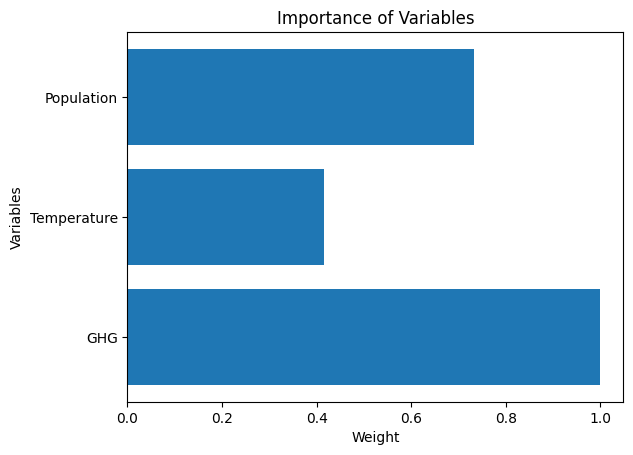

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the optimized weights
# ghg_weights_optimized = 0.3
# temperature_weights_optimized = 0.5
# population_weights_optimized = 0.2

# Create a list of variables and corresponding weights
variables = ['GHG', 'Temperature', 'Population']
weights = [ghg_weights_optimized, temperature_weights_optimized, population_weights_optimized]

# Plot the horizontal bar plot
plt.barh(variables, weights)
plt.xlabel('Weight')
plt.ylabel('Variables')
plt.title('Importance of Variables')

# Display the plot
plt.show()

### Particle Swarm Optimization

Particle Swarm Optimization (PSO) is a metaheuristic optimization algorithm inspired by the social behavior of bird flocking or fish schooling. It can be used to find optimal solutions in various optimization problems, including weighted sum optimization. In this program, PSO is applied to find optimal weights for a weighted sum of normalized data.

**Problem Formulation**

Given the following data arrays:

- `ghg_data`: Array of annual greenhouse gas (GHG) emissions.
- `temperature_data`: Array of annual mean temperatures.
- `population_data`: Array of annual population numbers.

The goal is to find optimal weights (`ghg_weights`, `temperature_weights`, `population_weights`) such that the weighted sum of the normalized data is minimized.

**PSO Algorithm Overview**

1. **Data Normalization**: The data arrays (`ghg_data`, `temperature_data`, `population_data`) are normalized using the Min-Max scaling technique, ensuring that all values are within the range of [0, 1].

2. **Objective Function**: The objective function takes the weights (`x`) as input and calculates the fitness value based on the weighted sum of the normalized data. The weights are normalized by dividing them by the total sum of weights, ensuring that they add up to 1. The objective function is defined as:

   $ \text{Fitness}, \text{Constraints} = \text{objective\_function}(x, \text{ghg\_data\_normalized}, \text{temperature\_data\_normalized}, \text{population\_data\_normalized}) $

3. **Constraints**: Constraints are added to ensure that the sum of weights is equal to 1 and all weights are greater than or equal to 0. These constraints are defined as:

   Constraint 1: $ \text{ghg\_weights} + \text{temperature\_weights} + \text{population\_weights} - 1 \geq 0 $

   Constraint 2: $ \text{ghg\_weights} \geq 0 $

   Constraint 3: $ \text{temperature\_weights} \geq 0 $

   Constraint 4: $ \text{population\_weights} \geq 0 $

4. **Particle Swarm Optimization**: The PSO algorithm is run with the objective function, lower bounds (`lb`), upper bounds (`ub`), and maximum number of iterations (`maxiter`). PSO optimizes the weights to minimize the fitness value while satisfying the constraints.

5. **Optimization Results**: The optimized weights (`ghg_weights_optimized`, `temperature_weights_optimized`, `population_weights_optimized`) are extracted from the PSO result. These weights represent the optimized solution for the weighted sum optimization problem.

**Visualization: Convergence Plot**

The program includes a callback function that tracks the best objective value at each iteration. This information is stored in the `best_objective_values` list. To visualize the convergence of the optimization process, the list is plotted using matplotlib. The x-axis represents the iterations, while the y-axis represents the objective value. The plot shows how the objective value improves over iterations, indicating the convergence of the optimization process.

This algorithm program provides a framework for optimizing weights in a weighted sum optimization problem using Particle Swarm Optimization. It can be customized for different datasets and optimization objectives by modifying the objective function and constraints.

Please note that the success of the optimization depends on various factors such as the problem formulation, parameter tuning, and the quality of the dataset. It is recommended to analyze the results critically and validate them based on domain knowledge and additional evaluation methods.

In [ ]:
import numpy as np
from pyswarm import pso

# Load the dataset (assuming the data is stored in separate arrays)
# ghg_data = np.array([ghg1, ghg2, ghg3, ...])  # Annual number of GHG emissions
# temperature_data = np.array([temp1, temp2, temp3, ...])  # Annual mean temperature
# population_data = np.array([pop1, pop2, pop3, ...])  # Annual number of population

# Normalize the dataset
ghg_data_normalized = (ghg_data - np.min(ghg_data)) / (np.max(ghg_data) - np.min(ghg_data))
temperature_data_normalized = (temperature_data - np.min(temperature_data)) / (np.max(temperature_data) - np.min(temperature_data))
population_data_normalized = (population_data - np.min(population_data)) / (np.max(population_data) - np.min(population_data))

# Define the objective function for PSO
def objective_function(x):
    ghg_weights, temperature_weights, population_weights = x
    total_weights = ghg_weights + temperature_weights + population_weights
    
    # Normalize the weights
    ghg_weights /= total_weights
    temperature_weights /= total_weights
    population_weights /= total_weights
    
    # Calculate the weighted sum of normalized data
    weighted_sum = (
        ghg_weights * ghg_data_normalized +
        temperature_weights * temperature_data_normalized +
        population_weights * population_data_normalized
    )
    
    # Calculate the fitness value (e.g., minimize the sum of weighted values)
    fitness = np.sum(weighted_sum)
    
    return fitness

# Define the bounds for the variables (weights)
lb = np.array([0, 0, 0])  # Lower bounds for ghg_weights, temperature_weights, population_weights
ub = np.array([1, 1, 1])  # Upper bounds for ghg_weights, temperature_weights, population_weights

# Use PSO to optimize the objective function
xopt, fopt = pso(objective_function, lb, ub)

# Print the optimized weights
ghg_weights_optimized, temperature_weights_optimized, population_weights_optimized = xopt
print("Optimized Weights:")
print("GHG Weights:", ghg_weights_optimized)
print("Temperature Weights:", temperature_weights_optimized)
print("Population Weights:", population_weights_optimized)

C:\Users\HP\AppData\Local\Temp\ipykernel_11744\2077523500.py:20: RuntimeWarning: invalid value encountered in double_scalars
  ghg_weights /= total_weights
C:\Users\HP\AppData\Local\Temp\ipykernel_11744\2077523500.py:21: RuntimeWarning: invalid value encountered in double_scalars
  temperature_weights /= total_weights
C:\Users\HP\AppData\Local\Temp\ipykernel_11744\2077523500.py:22: RuntimeWarning: invalid value encountered in double_scalars
  population_weights /= total_weights


Stopping search: maximum iterations reached --> 100
Optimized Weights:
GHG Weights: 0.0
Temperature Weights: 0.0
Population Weights: 0.7416373286677962


## New Optimization Algorithm

### Honey Badger Algorithm

### Grey Wolf Optimization

### Driving Training Based Optimization